# Lesson 1 - 1D flow

## Notes:
* Linearity - only linear terms. no trancendentals, powers, multiplication, etc.
* Superposition - only useful for linear equations; a combination of solutions is still a solution
* Space-time grid - similar to an array, and useful to think of as one. Thus, an n-variate function is an n-d array.
* we picked forward difference discretization schema for temporal axis. Is this due to the flow of time being in the forward direction? Since time doesn't flow backwards, it makes little sense to use central or backward schema.
* we picked backward difference schema for spatial axis. Is this because the temporal axis is forward? Wouldn't central difference discretization schema make more sense for this?
* the truncation errors are both in the first order. not sure i like that...


## Code: 
all the code will follow this cell. This is to ease runtime and to make sure the scope of all variables remains the same. different iterations of the same code with different values or methods of computing the same solution will be in subsquent cells, while code-notes will be commented like usual.

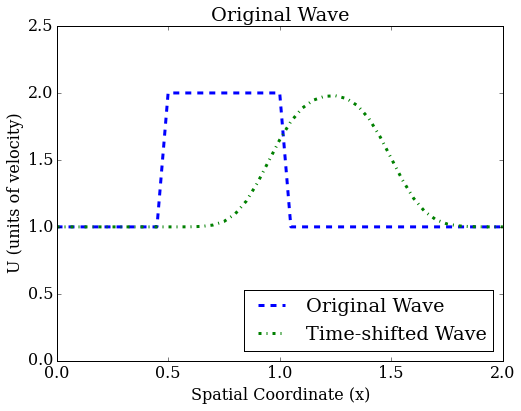

In [33]:
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16

xdom = 2 #spatial domain 
nx = 41 #number of points in x
dx = xdom/(nx-1) #distance between points in x (space step)
nt = 25 #number of steps in t
dt = .02 # distance between steps in t (time step)
c = 1 #arbitrary wavespeed

x = numpy.linspace(0,xdom,nx) #spatial domain, broken into steps
u=numpy.ones(nx) #set u to a straight line at 1
#create square wave with one line
u[numpy.intersect1d(numpy.where(x>=.5),numpy.where(x<=1))]=2

#visualize:
'''square wave is not exact. probably
due to some discretization error? going from 1 to do over
some delta x is going to give you a slope. you just want to
make the slope as large as possible, so the line appears as
vertical as possible. could be done by increase number of
steps in the x-domain'''
pyplot.figure(figsize=(8,6))
pyplot.plot(x,u, ls='--', lw=3)
pyplot.ylim(0,2.5)
pyplot.xlabel('Spatial Coordinate (x)')
pyplot.ylabel('U (units of velocity)')
pyplot.title('Original Wave')

#Now logically, we'd want to next the two axis into nested
#loops. The Notebook suggests something else later on though
# and i'm very curios to see what this is
for n in range(1,nt): #creates temporal loop
    un = u.copy() #copies the u vector
    for i in range(1,nx): #creates spatial loop
        '''what is interesting here is that we are saving
        the value of the solution in u, and not un. also
        we did not use the numpy.ones command as expected.'''
        u[i] = un[i]-c*dt/dx*(un[i]-un[i-1])
        
#visualize again
pyplot.plot(x,u, ls='-.', lw=3) 
pyplot.ylim(0,2.5)
pyplot.legend(['Original Wave','Time-shifted Wave'],
              loc='lower right')

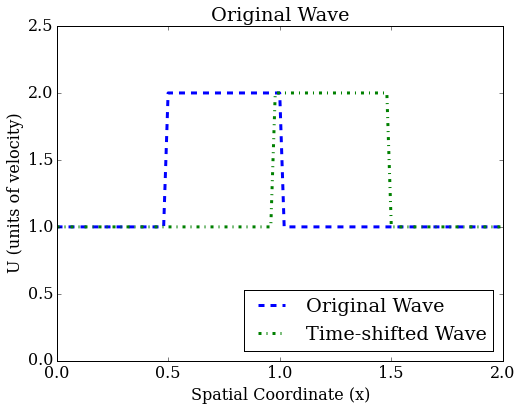

In [35]:
'''Copy of first main code cell, attempt to make grid finer
for first dig-deeper section. Crucial param = nx. Makes sense
as the wave distorts in the spatial axis. time changes don't
affect the shape much at all'''

import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16

xdom = 2 #spatial domain 
nx = 101 #number of points in x
dx = xdom/(nx-1) #distance between points in x (space step)
nt = 25 #number of steps in t
dt = .02 # distance between steps in t (time step)
c = 1 #arbitrary wavespeed

x = numpy.linspace(0,xdom,nx) #spatial domain, broken into steps
u=numpy.ones(nx) #set u to a straight line at 1
#create square wave with one line
u[numpy.intersect1d(numpy.where(x>=.5),numpy.where(x<=1))]=2

#visualize:
'''square wave is not exact. probably
due to some discretization error? going from 1 to do over
some delta x is going to give you a slope. you just want to
make the slope as large as possible, so the line appears as
vertical as possible. could be done by increase number of
steps in the x-domain'''
pyplot.figure(figsize=(8,6))
pyplot.plot(x,u, ls='--', lw=3)
pyplot.ylim(0,2.5)
pyplot.xlabel('Spatial Coordinate (x)')
pyplot.ylabel('U (units of velocity)')
pyplot.title('Original Wave')

#Now logically, we'd want to next the two axis into nested
#loops. The Notebook suggests something else later on though
# and i'm very curios to see what this is
for n in range(1,nt): #creates temporal loop
    un = u.copy() #copies the u vector
    for i in range(1,nx): #creates spatial loop
        '''what is interesting here is that we are saving
        the value of the solution in u, and not un. also
        we did not use the numpy.ones command as expected.'''
        u[i] = un[i]-c*dt/dx*(un[i]-un[i-1])
        
#visualize again
pyplot.plot(x,u, ls='-.', lw=3) 
pyplot.ylim(0,2.5)
pyplot.legend(['Original Wave','Time-shifted Wave'],
              loc='lower right')

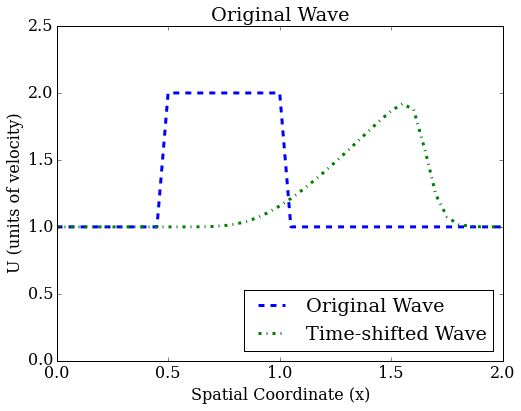

In [36]:
'''Copy of first main code cell, attempt to make the equation
non-linear. kept final time same for accurate comparisons.
The loss of shape could be due to the fact that the top of 
the wave is moving faster than the bottom, which pushes the 
the top of the wave towards the right (for a right-moving 
wave), which leads to the sharkfin seen here.'''
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16

xdom = 2 #spatial domain 
nx = 41 #number of points in x
dx = xdom/(nx-1) #distance between points in x (space step)
nt = 25 #number of steps in t
dt = .02 # distance between steps in t (time step)
#c = 1 #arbitrary wavespeed - not necessary here

x = numpy.linspace(0,xdom,nx) #spatial domain, broken into steps
u=numpy.ones(nx) #set u to a straight line at 1
#create square wave with one line
u[numpy.intersect1d(numpy.where(x>=.5),numpy.where(x<=1))]=2

#visualize:
'''square wave is not exact. probably
due to some discretization error? going from 1 to do over
some delta x is going to give you a slope. you just want to
make the slope as large as possible, so the line appears as
vertical as possible. could be done by increase number of
steps in the x-domain'''
pyplot.figure(figsize=(8,6))
pyplot.plot(x,u, ls='--', lw=3)
pyplot.ylim(0,2.5)
pyplot.xlabel('Spatial Coordinate (x)')
pyplot.ylabel('U (units of velocity)')
pyplot.title('Original Wave')

#Now logically, we'd want to next the two axis into nested
#loops. The Notebook suggests something else later on though
# and i'm very curios to see what this is
for n in range(1,nt): #creates temporal loop
    un = u.copy() #copies the u vector
    for i in range(1,nx): #creates spatial loop
        '''what is interesting here is that we are saving
        the value of the solution in u, and not un. also
        we did not use the numpy.ones command as expected.'''
        # this could also have been done with the following
        # python equivalent to the apply functions in R :
        # u[1:] = un[1:]-un[1:]*dt/dx*(un[1:]-un[0:-1]) 
        # u[0] = 1.0
        u[i] = un[i]-un[i]*dt/dx*(un[i]-un[i-1])
        
#visualize again
pyplot.plot(x,u, ls='-.', lw=3) 
pyplot.ylim(0,2.5)
pyplot.legend(['Original Wave','Time-shifted Wave'],
              loc='lower right')